In [1]:
# including the project directory to the notebook level
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# import modules
from alumni_scripts import alumni_data_utils as a_utils
import json
import pandas as pd
import numpy as np

In [3]:
with open('../alumni_scripts/meta_data.json', 'r') as fp:
        meta_data_ = json.load(fp)
scaler = a_utils.dataframescaler(meta_data_['column_stats_half_hour'])

In [4]:
df_ = a_utils.readcsv('../tmp/rl_perf_data/EnvId0-results.csv')
df_['datetime'] = pd.to_datetime(df_['datetime'])
df_.set_index(keys='datetime',inplace=True, drop = True)
df_ = a_utils.dropNaNrows(df_)

df_delta = df_[['delta_unscaled']]
df_.drop(columns=['delta_unscaled'], inplace =True)

In [5]:
df_.columns

Index(['rl_cwe', 'rl_hwe', 'hist_cwe', 'hist_hwe', 'reward_energy',
       'reward_comfort', 'oat', 'oah', 'wbt', 'T_rl_disch', 'avg_stpt',
       'T_hist_disch'],
      dtype='object')

In [6]:
meta_data_['column_stats_half_hour'].keys()

dict_keys(['pchwst', 'vrf50', 'oat', 'sat', 'sat_stpt', 'oah', 'vrf67', 'pchw_flow', 'hwe', 'vrf1', 'vrf30', 'vrf34', 'vrf74', 'cwe', 'hws_st_stpt', 'vrf60', 'vrf63', 'hws_st', 'hws_vlv1', 'vrf77', 'vrf64', 'vrf10', 'ee', 'hws_rt', 'vrf100', 'vrf40', 'hws_flow', 'vrf108', 'vrf20', 'wbt', 'avg_stpt'])

In [7]:
df = df_.copy()

In [8]:
scaling_cols = ['cwe','hwe','cwe','hwe','oat', 'oah', 'wbt','sat_stpt','avg_stpt','sat_stpt']
to_scale = ['rl_cwe', 'rl_hwe', 'hist_cwe', 'hist_hwe','oat', 'oah', 'wbt', 'T_rl_disch', 'avg_stpt', 'T_hist_disch']
df_[to_scale] = scaler.minmax_inverse_scale(df_[to_scale], scaling_cols, to_scale)

In [9]:
df_['rl_total_e'] = df_['rl_hwe']+df_['rl_cwe']
df_['hist_total_e'] = df_['hist_hwe']+df_['hist_cwe']

In [10]:
df_['delta_unscaled'] = df_delta['delta_unscaled']

In [11]:
df_['new_Stpt'] = df_['delta_unscaled'] + df_['T_rl_disch']

In [13]:
#df_[['delta_unscaled', 'T_rl_disch', 'avg_stpt', 'new_Stpt', 'T_hist_disch']].iloc[-30:,:]
df_.iloc[-10:,:]

,rl_cwe,rl_hwe,hist_cwe,hist_hwe,reward_energy,reward_comfort,oat,oah,wbt,T_rl_disch,avg_stpt,T_hist_disch,rl_total_e,hist_total_e,delta_unscaled,new_Stpt
datetime,,,,,,,,,,,,,,,,
2020-06-05 18:30:00+00:00,25.167021,-3.441691e-15,25.167021,-3.441691e-15,-0.0,-2.276066,86.443389,49.130152,71.668866,61.281442,72.933504,64.602252,25.167021,25.167021,-0.292348,60.989094
2020-06-05 19:00:00+00:00,25.167021,-3.441691e-15,25.167021,-3.441691e-15,-0.0,-1.714847,86.448789,47.112978,70.981709,63.203066,72.933504,64.631322,25.167021,25.167021,0.856419,64.059485
2020-06-05 19:30:00+00:00,25.167021,-3.441691e-15,25.167021,-3.441691e-15,-0.0,-2.015156,86.596244,46.415920,70.858708,62.174802,72.933504,64.806920,25.167021,25.167021,-0.458271,61.716531
2020-06-05 20:00:00+00:00,25.167021,-3.441691e-15,25.167021,-3.441691e-15,-0.0,-2.325235,86.862375,46.443309,71.082804,61.113085,72.933504,64.893169,25.167021,25.167021,-0.473181,60.639904
2020-06-05 20:30:00+00:00,25.167021,-3.441691e-15,25.167021,-3.441691e-15,-0.0,-2.505515,86.054180,46.301979,70.381498,60.495803,72.933504,64.627314,25.167021,25.167021,-0.275107,60.220696
2020-06-05 21:00:00+00:00,25.167021,-3.441691e-15,25.167021,-3.441691e-15,-0.0,-2.354506,85.739944,46.571580,70.221038,61.012859,72.933504,64.568023,25.167021,25.167021,0.230439,61.243298
2020-06-05 21:30:00+00:00,25.167021,-3.441691e-15,25.167021,-3.441691e-15,-0.0,-2.324212,86.717228,46.390573,70.947521,61.116587,72.933504,64.688588,25.167021,25.167021,0.046229,61.162815
2020-06-05 22:00:00+00:00,25.167021,-3.441691e-15,25.167021,-3.441691e-15,-0.0,-2.253314,87.155865,45.605103,71.024196,61.359344,72.933504,64.868053,25.167021,25.167021,0.108191,61.467536
2020-06-05 22:30:00+00:00,25.167021,-3.441691e-15,25.167021,-3.441691e-15,-0.0,-2.282656,86.924102,44.744525,70.533325,61.258877,72.933504,64.867932,25.167021,25.167021,-0.044776,61.214101


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


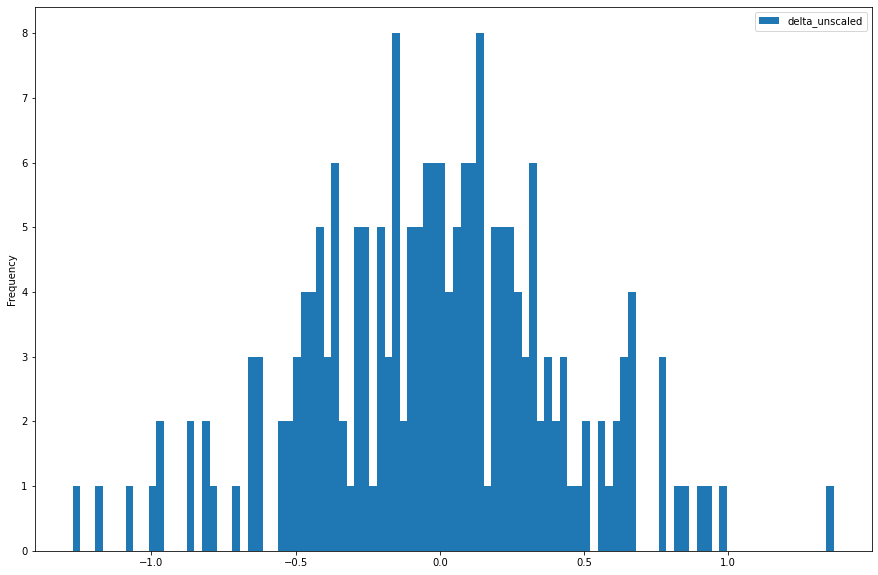

In [14]:
df_.iloc[-200:,:].plot(kind = 'hist', y = ['delta_unscaled'], figsize=(15, 10), bins=100)

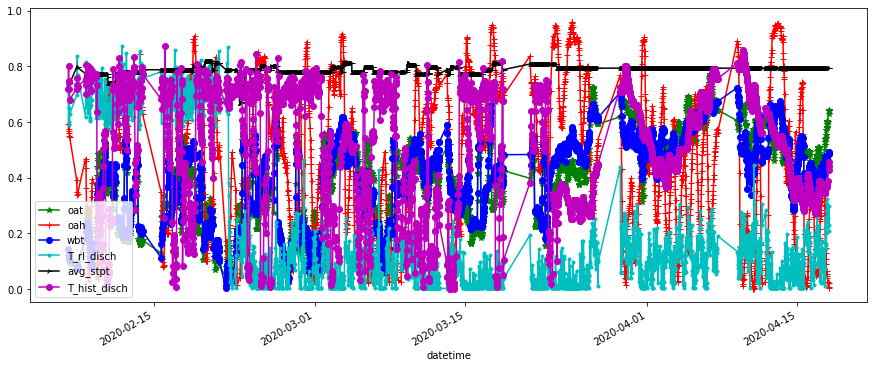

In [16]:
df.plot(y=['oat', 'oah', 'wbt', 'T_rl_disch', 'avg_stpt', 'T_hist_disch'],
         figsize=(15, 6),
         style=['g*-', 'r+-', 'bo-', 'c.-', 'k4-', 'mo-'])

# df.plot(y=['wbt', 'T_rl_disch', 'avg_stpt', 'T_hist_disch'],
#          figsize=(15, 10),
#          style=['bo-', 'c.-', 'k4-', 'mo-'])

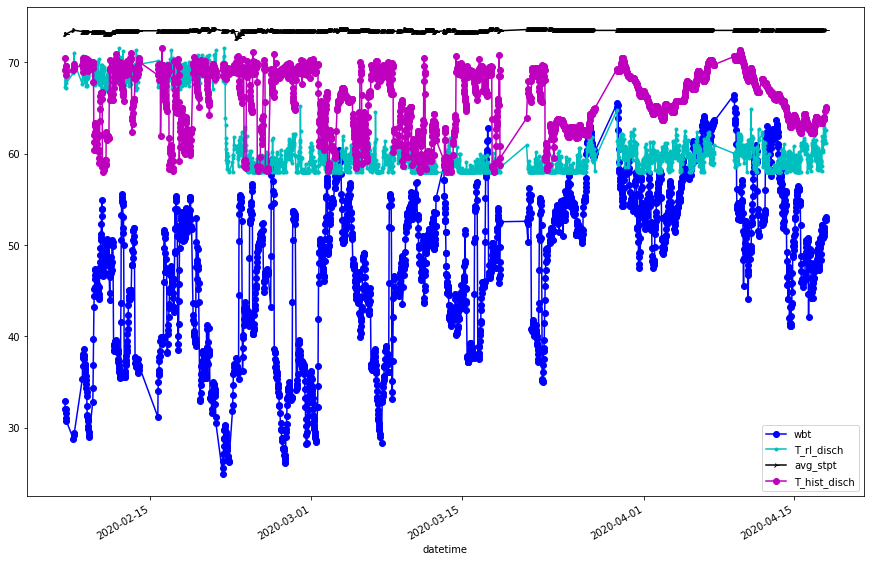

In [17]:
# df_.plot(y=['oat', 'oah', 'wbt', 'T_rl_disch', 'avg_stpt', 'T_hist_disch'],
#          figsize=(15, 10),
#          style=['g*-', 'r+-', 'bo-', 'c.-', 'k4-', 'mo-'])
df_.plot(y=['wbt', 'T_rl_disch', 'avg_stpt', 'T_hist_disch'],
         figsize=(15, 10),
         style=['bo-', 'c.-', 'k4-', 'mo-'])

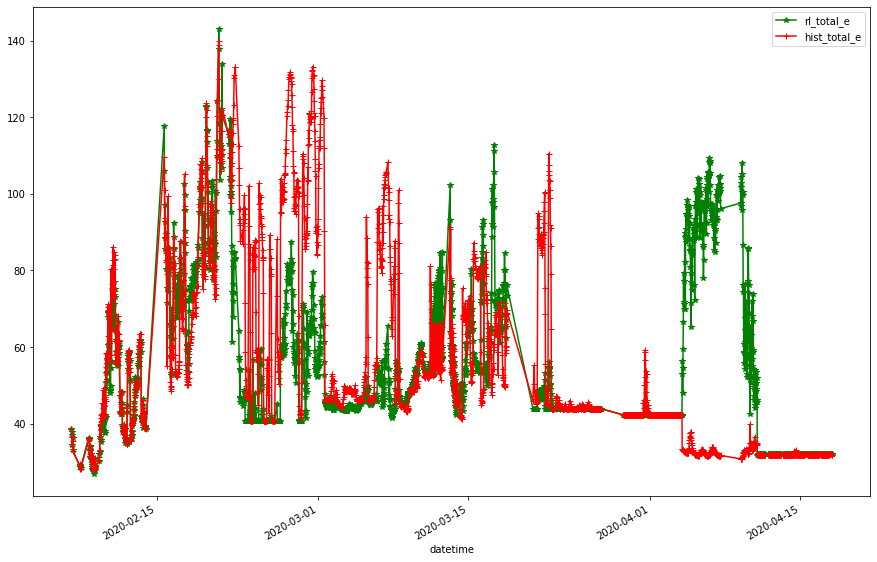

In [18]:
# df_.loc['2020-04-23 23:30:00+00:00':'2020-05-13 23:30:00+00:00', :].plot(
#     y=['rl_total_e', 'hist_total_e'], figsize=(15, 10), style=['g*-', 'r+-'])
df_.plot(y=['rl_total_e', 'hist_total_e'],
         figsize=(15, 10),
         style=['g*-', 'r+-'])

# Code cemetery

In [ ]:
with open('../alumni_scripts/meta_data.json', 'r') as fp:
        meta_data_ = json.load(fp)
stats = pd.DataFrame(meta_data_['column_stats_half_hour'])
stpt_cols = [ele for ele in stats.columns if 'vrf' in ele]

average = np.mean(stats[stpt_cols].loc['mean',:])
std = np.sqrt(np.mean(np.square(stats[stpt_cols].loc['std',:])))
count = 23585.000000
min_ = np.mean(stats[stpt_cols].loc['min',:])
max_ = np.mean(stats[stpt_cols].loc['max',:])
twentyfive_pct = np.mean(stats[stpt_cols].loc['25%',:])
fifty_pct = np.mean(stats[stpt_cols].loc['50%',:])
seventyfive_pct = np.mean(stats[stpt_cols].loc['75%',:])

print(count)
print(average)
print(std)
print(min_)
print(twentyfive_pct)
print(fifty_pct)
print(seventyfive_pct)
print(max_)

In [20]:
# including the project directory to the notebook level
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import numpy as np
import pandas as pd
import json
import warnings
from alumni_scripts import alumni_data_utils as a_utils
with warnings.catch_warnings():
    from stable_baselines import PPO2

In [21]:
with open('../alumni_scripts/meta_data.json', 'r') as fp:
    meta_data_ = json.load(fp)

In [22]:
col_names = ['oat', 'oah', 'wbt', 'avg_stpt', 'sat']
scaler = a_utils.dataframescaler(meta_data_['column_stats_half_hour'])

In [ ]:
with warnings.catch_warnings():
    rl_agent = PPO2.load('../models/best_rl_agent')

In [103]:
 obs = scaler.minmax_scale(np.array([36.105231,63.080922,31.559963,73.122596,68.118609]),col_names,col_names)
# 36.105231,63.080922,31.559963,73.122596,68.118609 #71.879747,36.219457,60.829027,72.502665,65.84595

In [105]:
rl_agent.predict(obs, deterministic=True)

(array([-2.], dtype=float32), None)

In [56]:
rl_agent.action_probability(obs, actions=None)

array([[0.12413701]], dtype=float32)

In [59]:
rl_agent.action_probability(obs, actions=np.array([0.12413]), logp=False)

array([0.33489692])